# Assignment 2.2

Problem Statement -
Build a CNN for Cifar100 data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

from keras.datasets import cifar100

import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 13s 0us/step


In [ ]:
print(np.unique(y_train))
print(len(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
50000


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

### Visualizing training images 

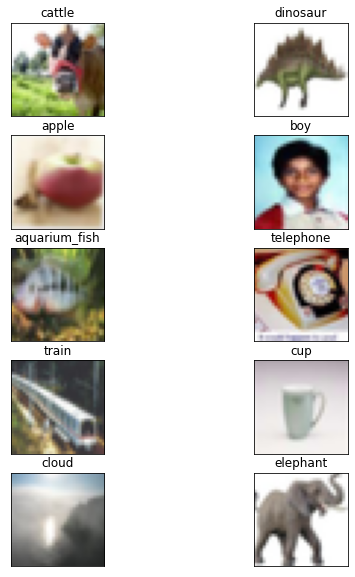

In [ ]:
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(y_train[i])
plt.show()

### Normalizing images

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
tf.keras.backend.clear_session()

### Model Building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, callbacks=[early_stop],
                    validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 20s 5ms/step - loss: 3.6757 - accuracy: 0.1365 - val_loss: 3.1448 - val_accuracy: 0.2234
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9478 - accuracy: 0.2651 - val_loss: 2.8002 - val_accuracy: 0.2934
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6076 - accuracy: 0.3323 - val_loss: 2.6022 - val_accuracy: 0.3400
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3592 - accuracy: 0.3871 - val_loss: 2.5231 - val_accuracy: 0.3600
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1589 - accuracy: 0.4263 - val_loss: 2.4496 - val_accuracy: 0.3797
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9820 - accuracy: 0.4691 - val_loss: 2.4636 - val_accuracy: 0.3849
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8083 - accuracy: 0.5077 - val_loss: 2.4934 - val_accuracy

### Model Performance

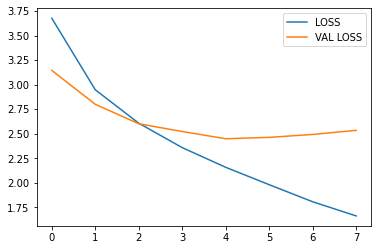

In [ ]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="VAL LOSS")
plt.legend(loc='best')
plt.show()

In [ ]:
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)

In [ ]:
print(accuracy_score(y_test, pred))

0.3873


In [ ]:
y_test=y_test.astype('float')
print(log_loss(y_test, prob))

2.5349661792819114


In [ ]:
confusion_matrix(y_test,pred)

array([[71,  1,  0, ...,  0,  0,  0],
       [ 1, 62,  1, ...,  0,  0,  0],
       [ 2,  0, 24, ...,  0,  8,  1],
       ...,
       [ 0,  1,  2, ..., 33,  0,  0],
       [ 1,  0, 10, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  1,  0, 33]])

### Predictions

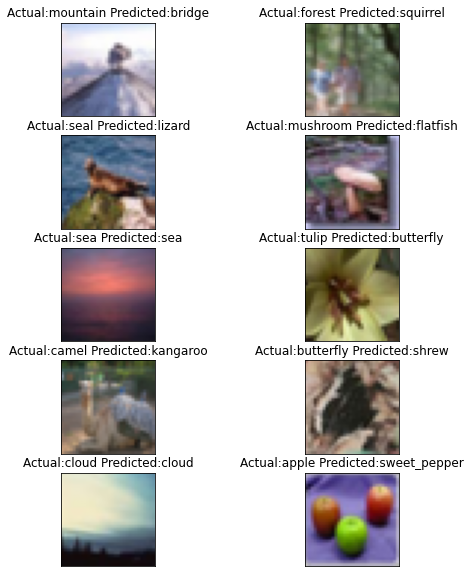

In [ ]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()